## Tasks — Classification (week 2):

In this question, using the beer review data, we’ll try to predict ratings (positive or negative) based on characteristics of beer reviews. Load the 50,000 beer review dataset, and construct a label vector by considering whether a review score is four or above, i.e.,
$y = [d[’review/overall’] >= 4 for d in dataset]$

In [1]:
import numpy
from urllib.request import urlopen
import scipy.optimize
import random
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
def parseDataFromURL(fname):
  for l in urlopen(fname):
    yield eval(l)

In [3]:
def parseData(fname):
  for l in open(fname):
    yield eval(l)

In [4]:
print("Reading data...")
data = list(parseData("data/beer_50000.json"))
print("done")

Reading data...
done


### Q7
Fit a logistic regressor that estimates the binarized score from review length. Using the class weight=’balanced’ option, report the True Positive, True Negative, False Positive, False Negative, and Balanced Error Rates of the predictor.

In [5]:
def feature(datum):
  feat = [1]
  reviewlen = len(datum['review/text'])
  feat.append(reviewlen)
  return feat

In [6]:
X = [feature(d) for d in data]
y = [d['review/overall'] >= 4 for d in data]

In [7]:
mod = linear_model.LogisticRegression(C=1.0, class_weight='balanced')
mod.fit(X,y)

LogisticRegression(class_weight='balanced')

In [8]:
pred = mod.predict(X)

In [9]:
TP_ = numpy.logical_and(pred, y)
FP_ = numpy.logical_and(pred, numpy.logical_not(y))
TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(y))
FN_ = numpy.logical_and(numpy.logical_not(pred), y)

In [10]:
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)

In [11]:
print('TP is ', TP, 'FP is ', FP, 'TN is ', TN, 'FN is ', FN)

TP is  14201 FP is  5885 TN is  10503 FN is  19411


In [12]:
BER = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))

In [13]:
print('BER is', BER)

BER is 0.4683031525957275


### Q8
Plot the precision@K of your classifier for K = {1 . . . 10000} (i.e., the x-axis of your plot should be K, and the y-axis of your plot should be the precision@K).

In [14]:
scores = mod.decision_function(X)

In [15]:
scores_labels = list(zip(scores, y))
scores_labels.sort(reverse = True)

In [16]:
sortedlabels = [x[1] for x in scores_labels]

In [17]:
p_K = [(sum(sortedlabels[:n]) / n) for n in range (1, 10001, 100)] 

In [18]:
K = numpy.arange(1, 10001, 100)

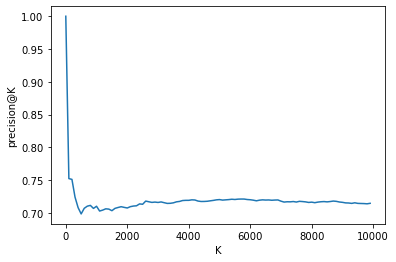

In [19]:
plt.xlabel("K")
plt.ylabel("precision@K") 
plt.plot(K, p_K) 
plt.show()

### Q9
Our precision@K plot from Question 8 only measures precision with regard to the positive class. For this type of binary classification, we may be equally interested in the classifier’s accuracy for both the positive and negative classes. Recompute confidence scores for your classifier so that the ‘most confident’ predictions include either the most confident positive or the most confident negative predictions (i.e., probability closest to 1 or probability closest to zero).3 The precision@K now measures whether
the classifier has the correct label (either ‘positive’ or ‘negative’) among the K most confident entries. Report this precision@K for K ∈ {1, 100, 10000} and include a plot as in Question 8.

In [20]:
scores_1 = abs(mod.decision_function(X))

In [21]:
scores_labels_1 = list(zip(scores_1, y, pred))
scores_labels_1.sort(reverse = True)

In [22]:
sortedlabels_1 = [(((x[1] == True) and (x[2] == True)) 
                   or ((x[1] == False) and (x[2] == False))) 
                  for x in scores_labels_1]

In [23]:
p_K_1 = [(sum(sortedlabels_1[:n]) / n) for n in range (1, 10001, 100)] 

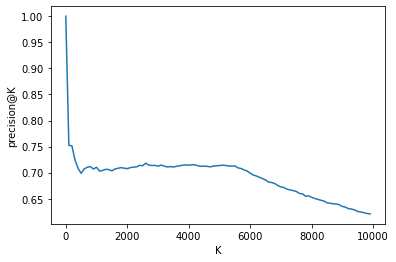

In [24]:
plt.xlabel("K")
plt.ylabel("precision@K") 
plt.plot(K, p_K_1) 
plt.show()

In [25]:
print('percision@1 is', sum(sortedlabels_1[:1]) / 1)

percision@1 is 1.0


In [26]:
print('percision@100 is', sum(sortedlabels_1[:100]) / 100)

percision@100 is 0.75


In [27]:
print('percision@10000 is', sum(sortedlabels_1[:10000]) / 10000)

percision@10000 is 0.6183
